# Regression #

I will stat by importing some needed libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I will create a dataset that I will use for Regression problem

(100, 1)

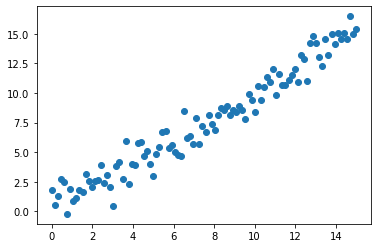

In [8]:
np.random.seed(0)
m = 100 # m represents the number of samples in my dataset which is 100
X = np.linspace(0, 15, m).reshape(m,1)
y = X + np.random.randn(m, 1)

plt.scatter(X, y)
X.shape

I will import LinearRegreesion model from sklearn as follows

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()
model.fit(X, y) # this is train the model
model.score(X, y) # this is for the evaluation of the model with coofficient of correlation

0.9479884325205652

The result shows that 94% of the time the model will make the right prediction

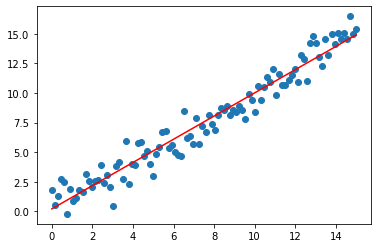

In [7]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red')

# Classification problem 

I use the titanic dataset from seaborn
Then I filter the data by selecting the columns are of interest to me- sex', 'age', 'pclass', 'survived- as seen below

In [8]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['sex', 'age', 'pclass', 'survived']]


titanic.shape
titanic.head()

,sex,age,pclass,survived
0,male,22.0,3,0
1,female,38.0,1,1
2,female,26.0,3,1
3,female,35.0,1,1
4,male,35.0,3,0


I then eliminate any missing varaible using dropna

In [10]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['sex', 'age', 'pclass', 'survived']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True) # I repalce male and female with 1 and 0 respectively

titanic.head()

,sex,age,pclass,survived
0,0,22.0,3,0
1,1,38.0,1,1
2,1,26.0,3,1
3,1,35.0,1,1
4,0,35.0,3,0


Now, I develop a machine learning model to determine if a titanic passenger will survive or not
This is a classification problem. I choose to use a KNeighborsClassifier model form sklearn 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model = KNeighborsClassifier() # I initialize my model

**Next , I need to train my model on the dataset X, and y, but I don't have X and y. I have a pandas table.
So, I will divide the table into two tables; a y table will consist of the 'survived' column and X will consist of the rest of the columns excluding 'survived'**

In [15]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [17]:
X

,sex,age,pclass
0,0,22.0,3
1,1,38.0,1
2,1,26.0,3
3,1,35.0,1
4,0,35.0,3
...,...,...,...
885,1,39.0,3
886,0,27.0,2
887,1,19.0,1
889,0,26.0,1


**I will train the model using the fit method and evaluate using the score method** 

In [18]:
model.fit(X, y)
model.score(X, y)

0.8319327731092437

The results of the evaluation shows a precision of 83%. That means 83% of the time the model will make the correct prediction of whether a passenger survived or not

I can use the predict to see the pasengers who survived (vaue of 1) and those that did not survive (vlaue of 0)

In [19]:
model.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

## Now. we can write a function to determine if a person would have survived in Titanic or not

In [34]:
def survived(model, sex=1, age=30, pclass=3):
    x = np.array([sex, age, pclass]).reshape(1, 3)
    print(model.predict(x))

In [35]:
survived(model)

[0]


Unfortunately, Kate didnot survive

We can claculate the probability that Jane belongs to pclass 1 using thr predict_proba method

In [32]:
def survived(model, sex=1, age=30, pclass=3):       # this is for Kate, a female passenger, age 30 in pclass 3
    x = np.array([sex, age, pclass]).reshape(1, 3)   
    print(model.predict(x))
    
    print(model.predict_proba(x))

In [33]:
survived(model)

[0]
[[0.8 0.2]]


The probability of Kate belonging to the "not survived" class is 80% and only 20% chance that she belongs to the survived class.